# ライブラリ

In [8]:
import os
import sys
sys.path.append(
    "/Users/koroku/program/competition/signate/202402_samples/table/binary_classification"
)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.preprocessing.tools import convert_column_type

# データの読み込み

In [11]:
RAW_DATA_DIR = "../data/raw"

In [12]:
df_train = pd.read_csv(
    os.path.join(RAW_DATA_DIR, "train.csv"),
    index_col=0
)
df_test = pd.read_csv(
    os.path.join(RAW_DATA_DIR, "test.csv"),
    index_col=0
)

In [13]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df_train.shape

(891, 11)

In [15]:
df_train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

# データの型変換

In [16]:
CONVERSION_DICT = {"Pclass": str, "SibSp": str, "Parch": str}

In [17]:
df_train = convert_column_type(df_train, CONVERSION_DICT)
df_test = convert_column_type(df_test, CONVERSION_DICT)

In [18]:
df_train.dtypes

Survived      int64
Pclass       object
Name         object
Sex          object
Age         float64
SibSp        object
Parch        object
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

# 統計量を確認

In [19]:
df_train.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891,891,714.000000,891,891,891,891.000000,204,889
unique,NaN,3,891,2,NaN,7,7,681,NaN,147,3
top,NaN,3,"Braund, Mr. Owen Harris",male,NaN,0,0,347082,NaN,B96 B98,S
freq,NaN,491,1,577,NaN,608,678,7,NaN,4,644
mean,0.383838,NaN,NaN,NaN,29.699118,NaN,NaN,NaN,32.204208,NaN,NaN
std,0.486592,NaN,NaN,NaN,14.526497,NaN,NaN,NaN,49.693429,NaN,NaN
min,0.000000,NaN,NaN,NaN,0.420000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,0.000000,NaN,NaN,NaN,20.125000,NaN,NaN,NaN,7.910400,NaN,NaN
50%,0.000000,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,14.454200,NaN,NaN
75%,1.000000,NaN,NaN,NaN,38.000000,NaN,NaN,NaN,31.000000,NaN,NaN


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    object 
 6   Parch     891 non-null    object 
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 83.5+ KB


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    object 
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    object 
 5   Parch     418 non-null    object 
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), object(8)
memory usage: 35.9+ KB


# データの可視化

## 目的変数

In [24]:
OBJECT_VARIABLE = "Survived"

In [25]:
df_train[OBJECT_VARIABLE].value_counts().sort_index()

Survived
0    549
1    342
Name: count, dtype: int64

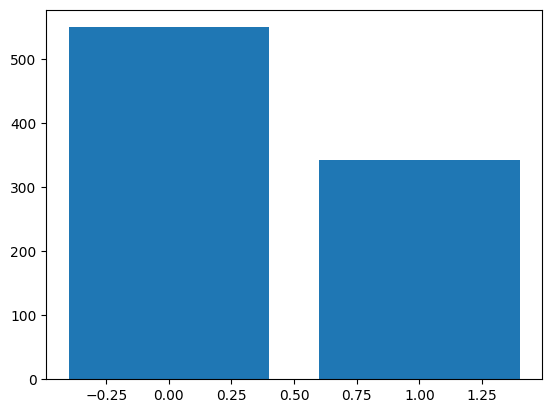

In [26]:
plt.bar(
    df_train[OBJECT_VARIABLE].value_counts().sort_index().index, 
    df_train[OBJECT_VARIABLE].value_counts().sort_index().values
)
plt.show()

## 説明変数

In [41]:
NUMERIC_COLUMNS = df_train.drop(OBJECT_VARIABLE, axis=1).select_dtypes(include=["int", "float"]).columns.to_list()
CATEGORY_COLUMNS = df_train.drop(OBJECT_VARIABLE, axis=1).select_dtypes(include=["object"]).columns.to_list()

### 数値変数の分布

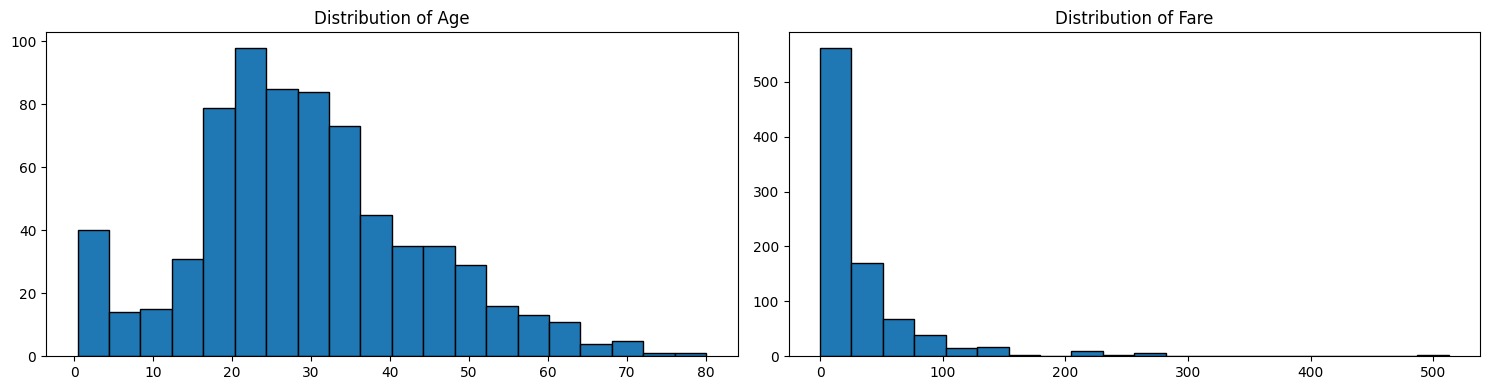

In [42]:
n_cols = 2
n_rows = len(NUMERIC_COLUMNS) // n_cols + len(NUMERIC_COLUMNS)%n_cols

plt.figure(figsize=(15, n_rows*4))

for i, column in enumerate(NUMERIC_COLUMNS, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df_train[column], bins=20, edgecolor="black")
    plt.title(f"Distribution of {column}")
    plt.tight_layout()
plt.show()

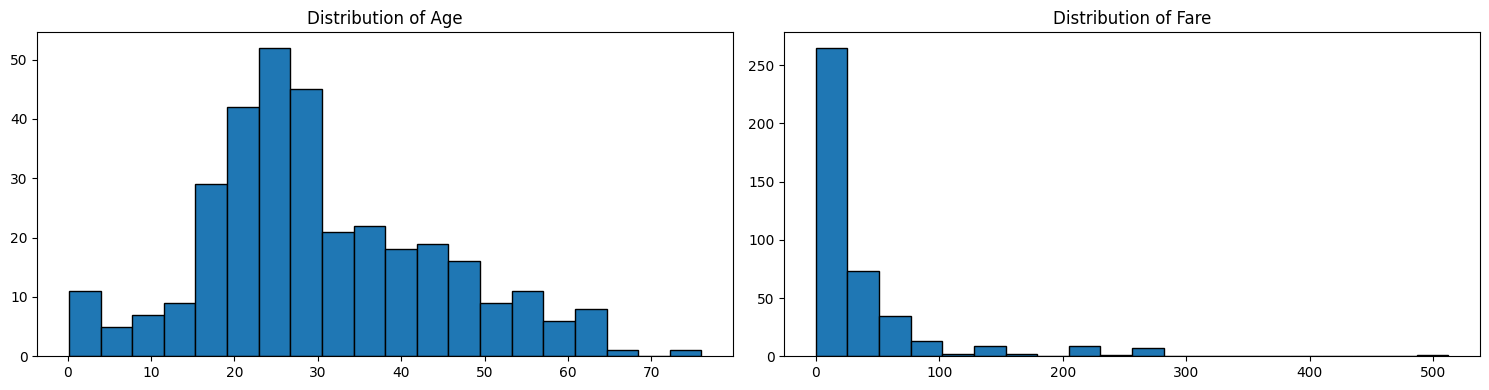

In [43]:
n_cols = 2
n_rows = len(NUMERIC_COLUMNS) // n_cols + len(NUMERIC_COLUMNS)%n_cols

plt.figure(figsize=(15, n_rows*4))

for i, column in enumerate(NUMERIC_COLUMNS, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df_test[column], bins=20, edgecolor="black")
    plt.title(f"Distribution of {column}")
    plt.tight_layout()
plt.show()

### カテゴリ変数の出現頻度

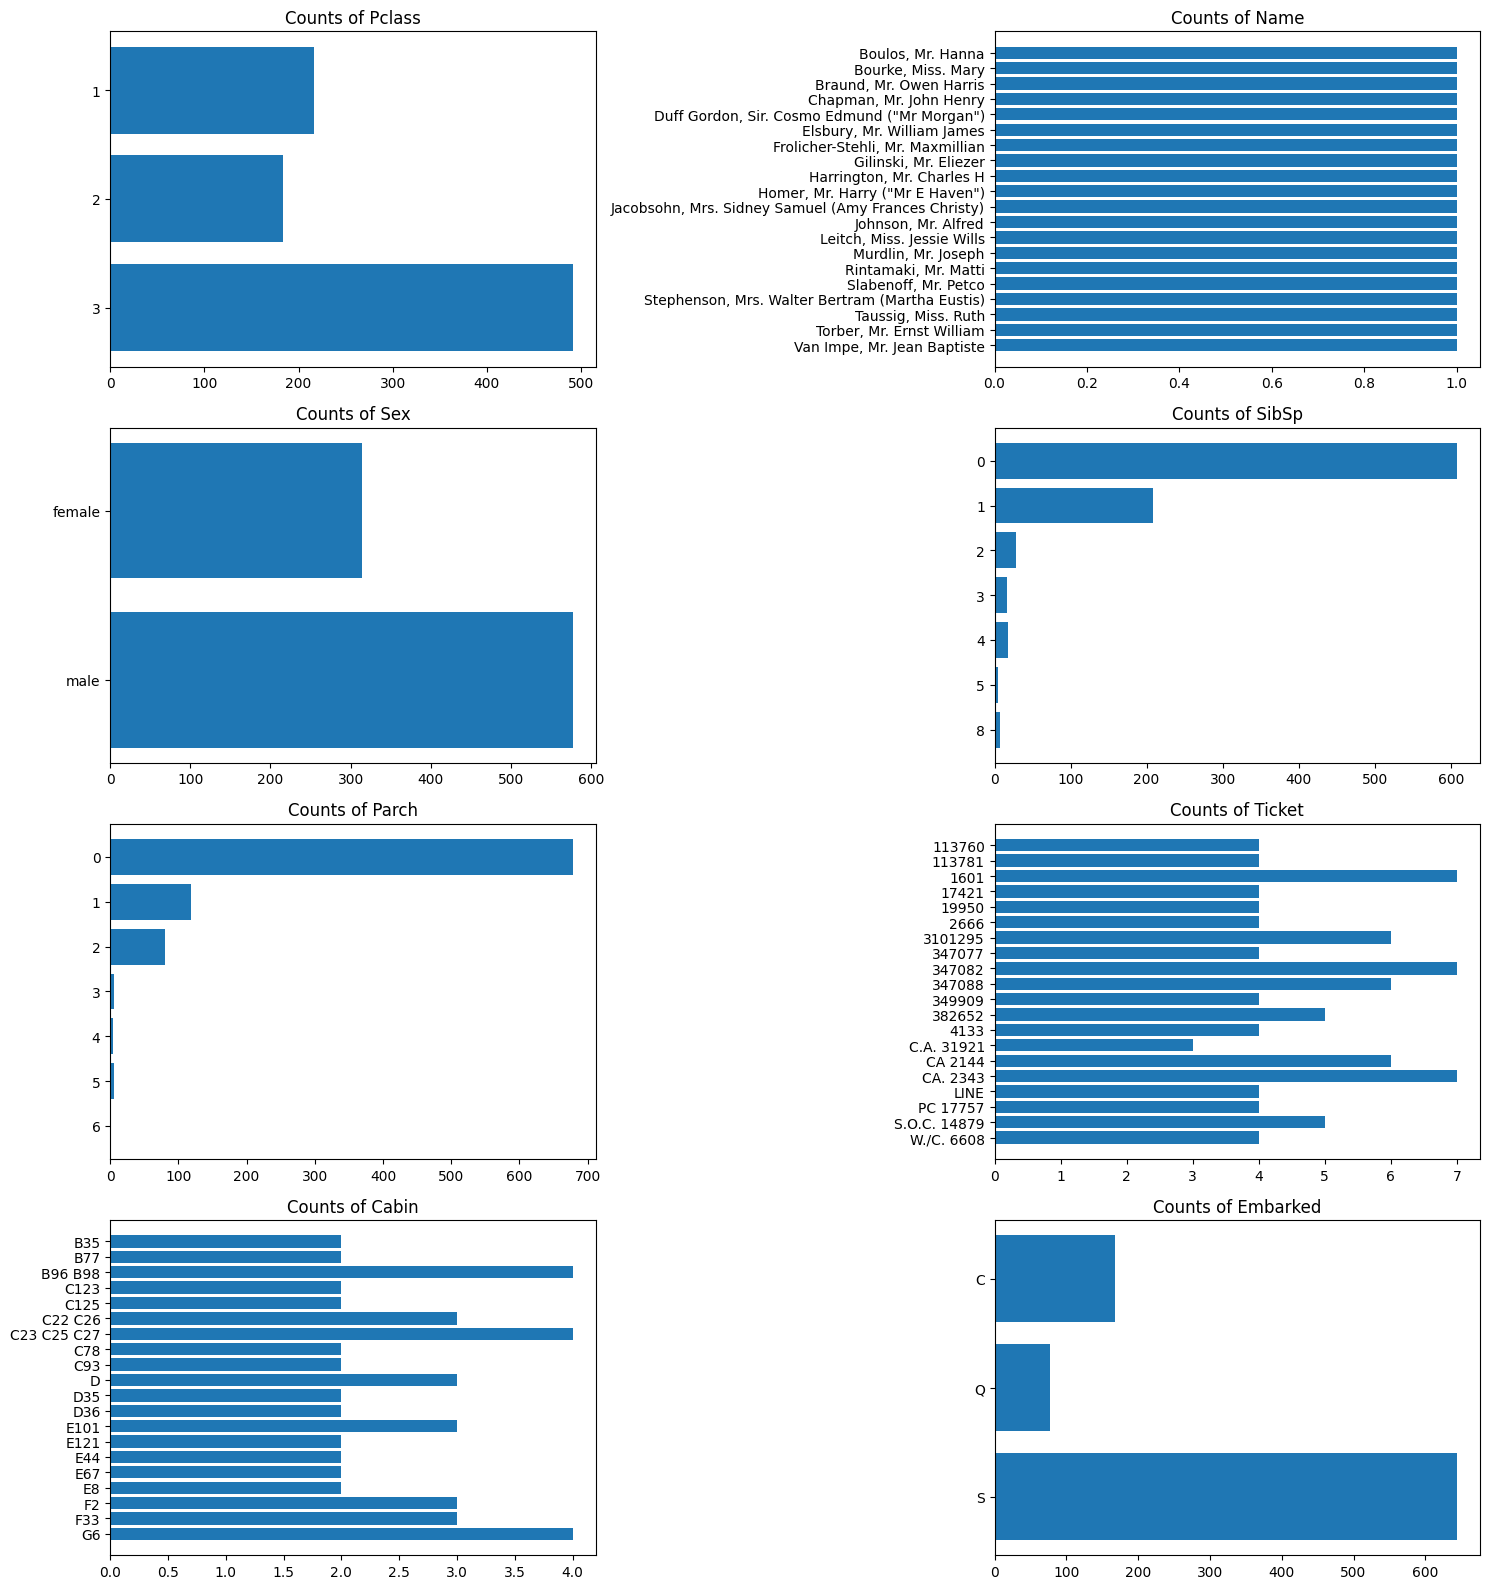

In [55]:
n_cols = 2
n_rows = len(CATEGORY_COLUMNS) // n_cols + len(CATEGORY_COLUMNS) % n_cols

plt.figure(figsize=(15, n_rows*4))

for i, column in enumerate(CATEGORY_COLUMNS, 1):
    plt.subplot(n_rows, n_cols, i)
    counts = df_train[column].value_counts().head(20)
    if len(counts) > 20:
        counts = counts.head(20).sort_index(ascending=False)
    else:
        counts = counts.sort_index(ascending=False)
    plt.barh(counts.index.astype(str), counts.values)
    plt.title(f"Counts of {column}")
    plt.tight_layout()
plt.show()

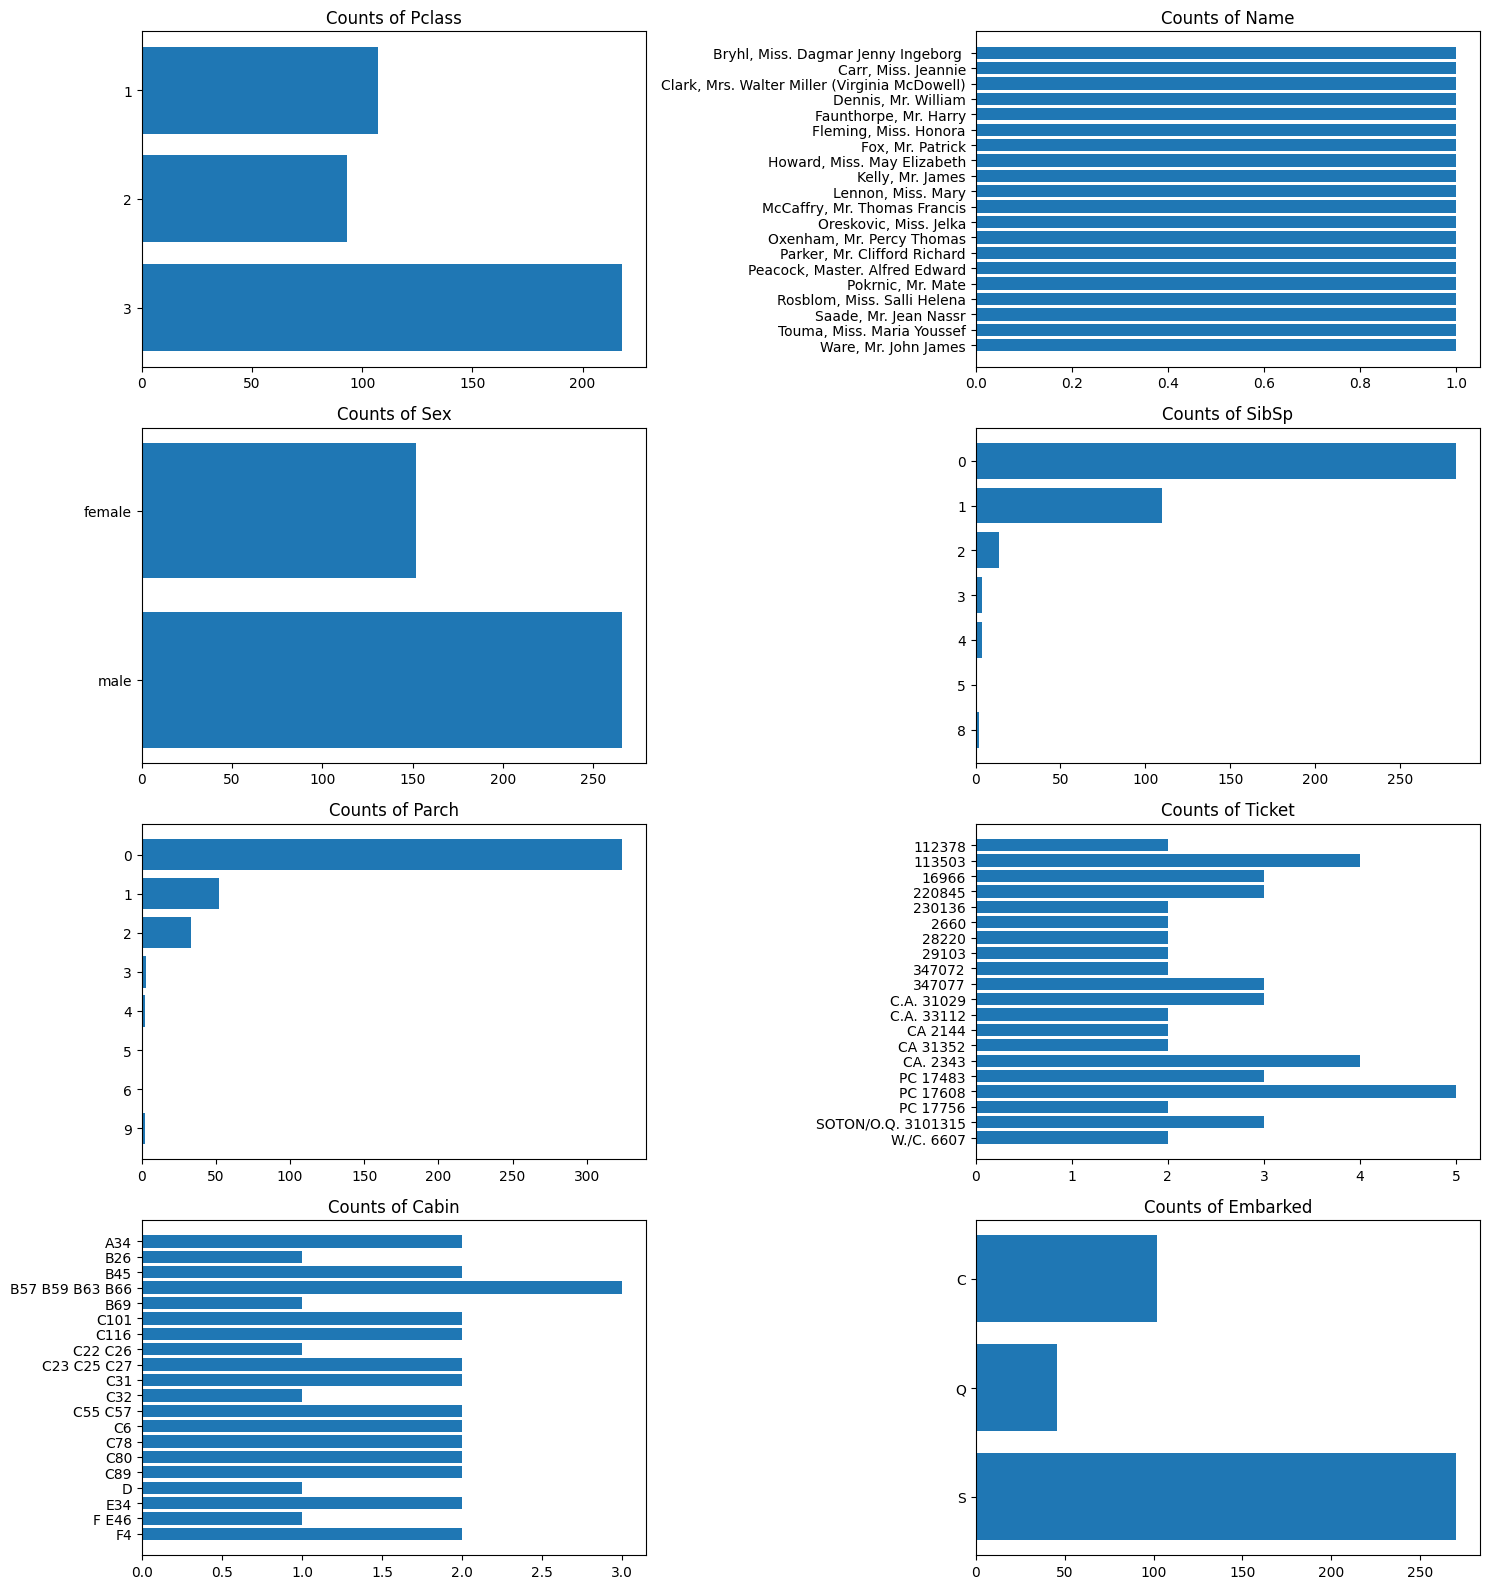

In [58]:
n_cols = 2
n_rows = len(CATEGORY_COLUMNS) // n_cols + len(CATEGORY_COLUMNS) % n_cols

plt.figure(figsize=(15, n_rows*4))

for i, column in enumerate(CATEGORY_COLUMNS, 1):
    plt.subplot(n_rows, n_cols, i)
    counts = df_test[column].value_counts().head(20)
    if len(counts) > 20:
        counts = counts.head(20).sort_index(ascending=False)
    else:
        counts = counts.sort_index(ascending=False)
    plt.barh(counts.index.astype(str), counts.values)
    plt.title(f"Counts of {column}")
    plt.tight_layout()
plt.show()

## 目的変数と説明変数の関係性

### 数値変数

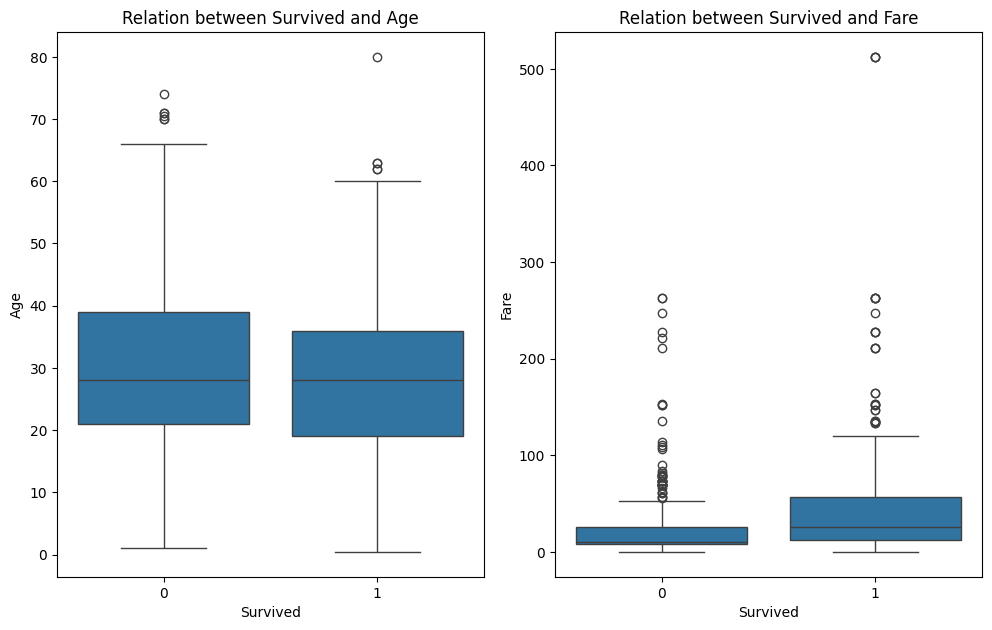

In [59]:
n_cols = 3
n_rows = len(NUMERIC_COLUMNS) // n_cols + len(NUMERIC_COLUMNS) % n_cols

plt.figure(figsize=(15, n_rows*6))

for i, column in enumerate(NUMERIC_COLUMNS, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=OBJECT_VARIABLE, y=column, data=df_train)
    plt.title(f"Relation between {OBJECT_VARIABLE} and {column}")
    plt.tight_layout()
plt.show()

### カテゴリ変数

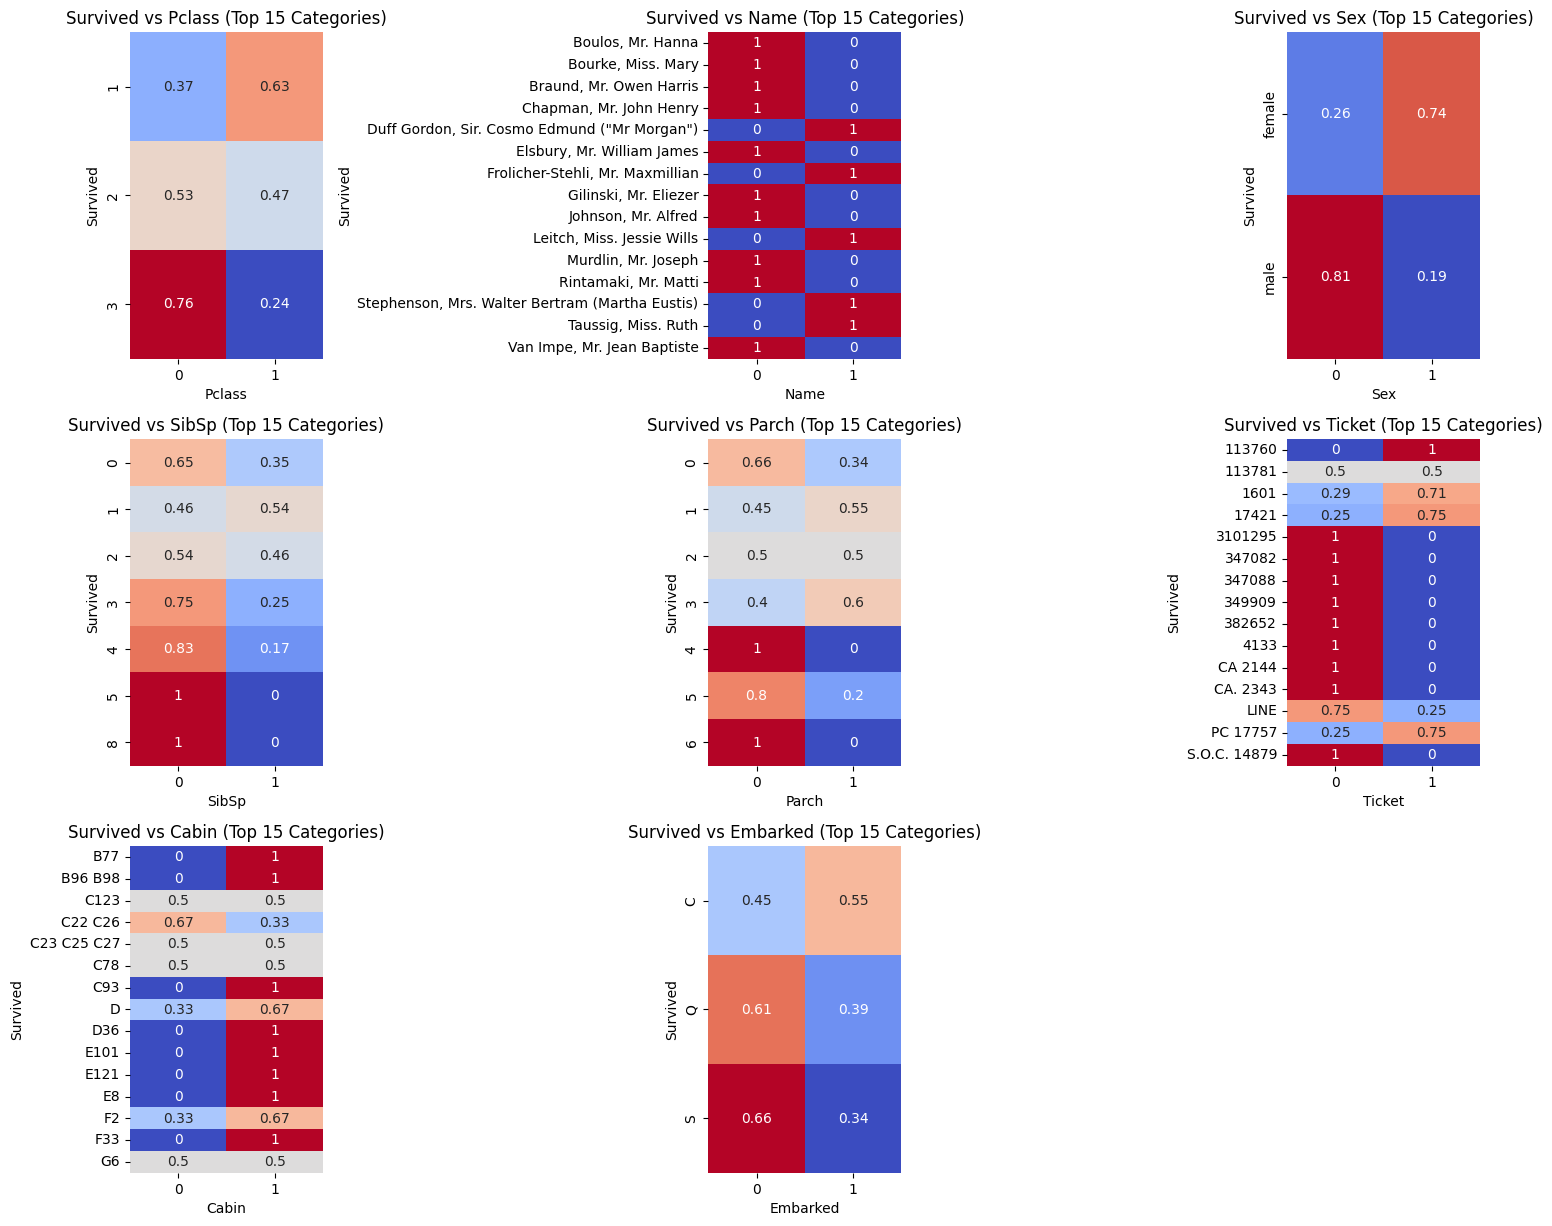

In [60]:
n_cols = 3
n_rows = len(CATEGORY_COLUMNS) // n_cols + len(CATEGORY_COLUMNS) % n_cols

plt.figure(figsize=(15, n_rows*4))

for i, column in enumerate(CATEGORY_COLUMNS, 1):
    plt.subplot(n_rows, n_cols, i)
    top_categories = df_train[column].value_counts().head(15).index
    df_filtered = df_train[df_train[column].isin(top_categories)]
    cross_tab = pd.crosstab(df_filtered[column], df_filtered[OBJECT_VARIABLE], normalize="index")
    sns.heatmap(cross_tab, annot=True, cmap="coolwarm", cbar=False)
    plt.title(f"{OBJECT_VARIABLE} vs {column} (Top 15 Categories)")
    plt.ylabel(OBJECT_VARIABLE)
    plt.xlabel(column)
    plt.tight_layout()
plt.show()

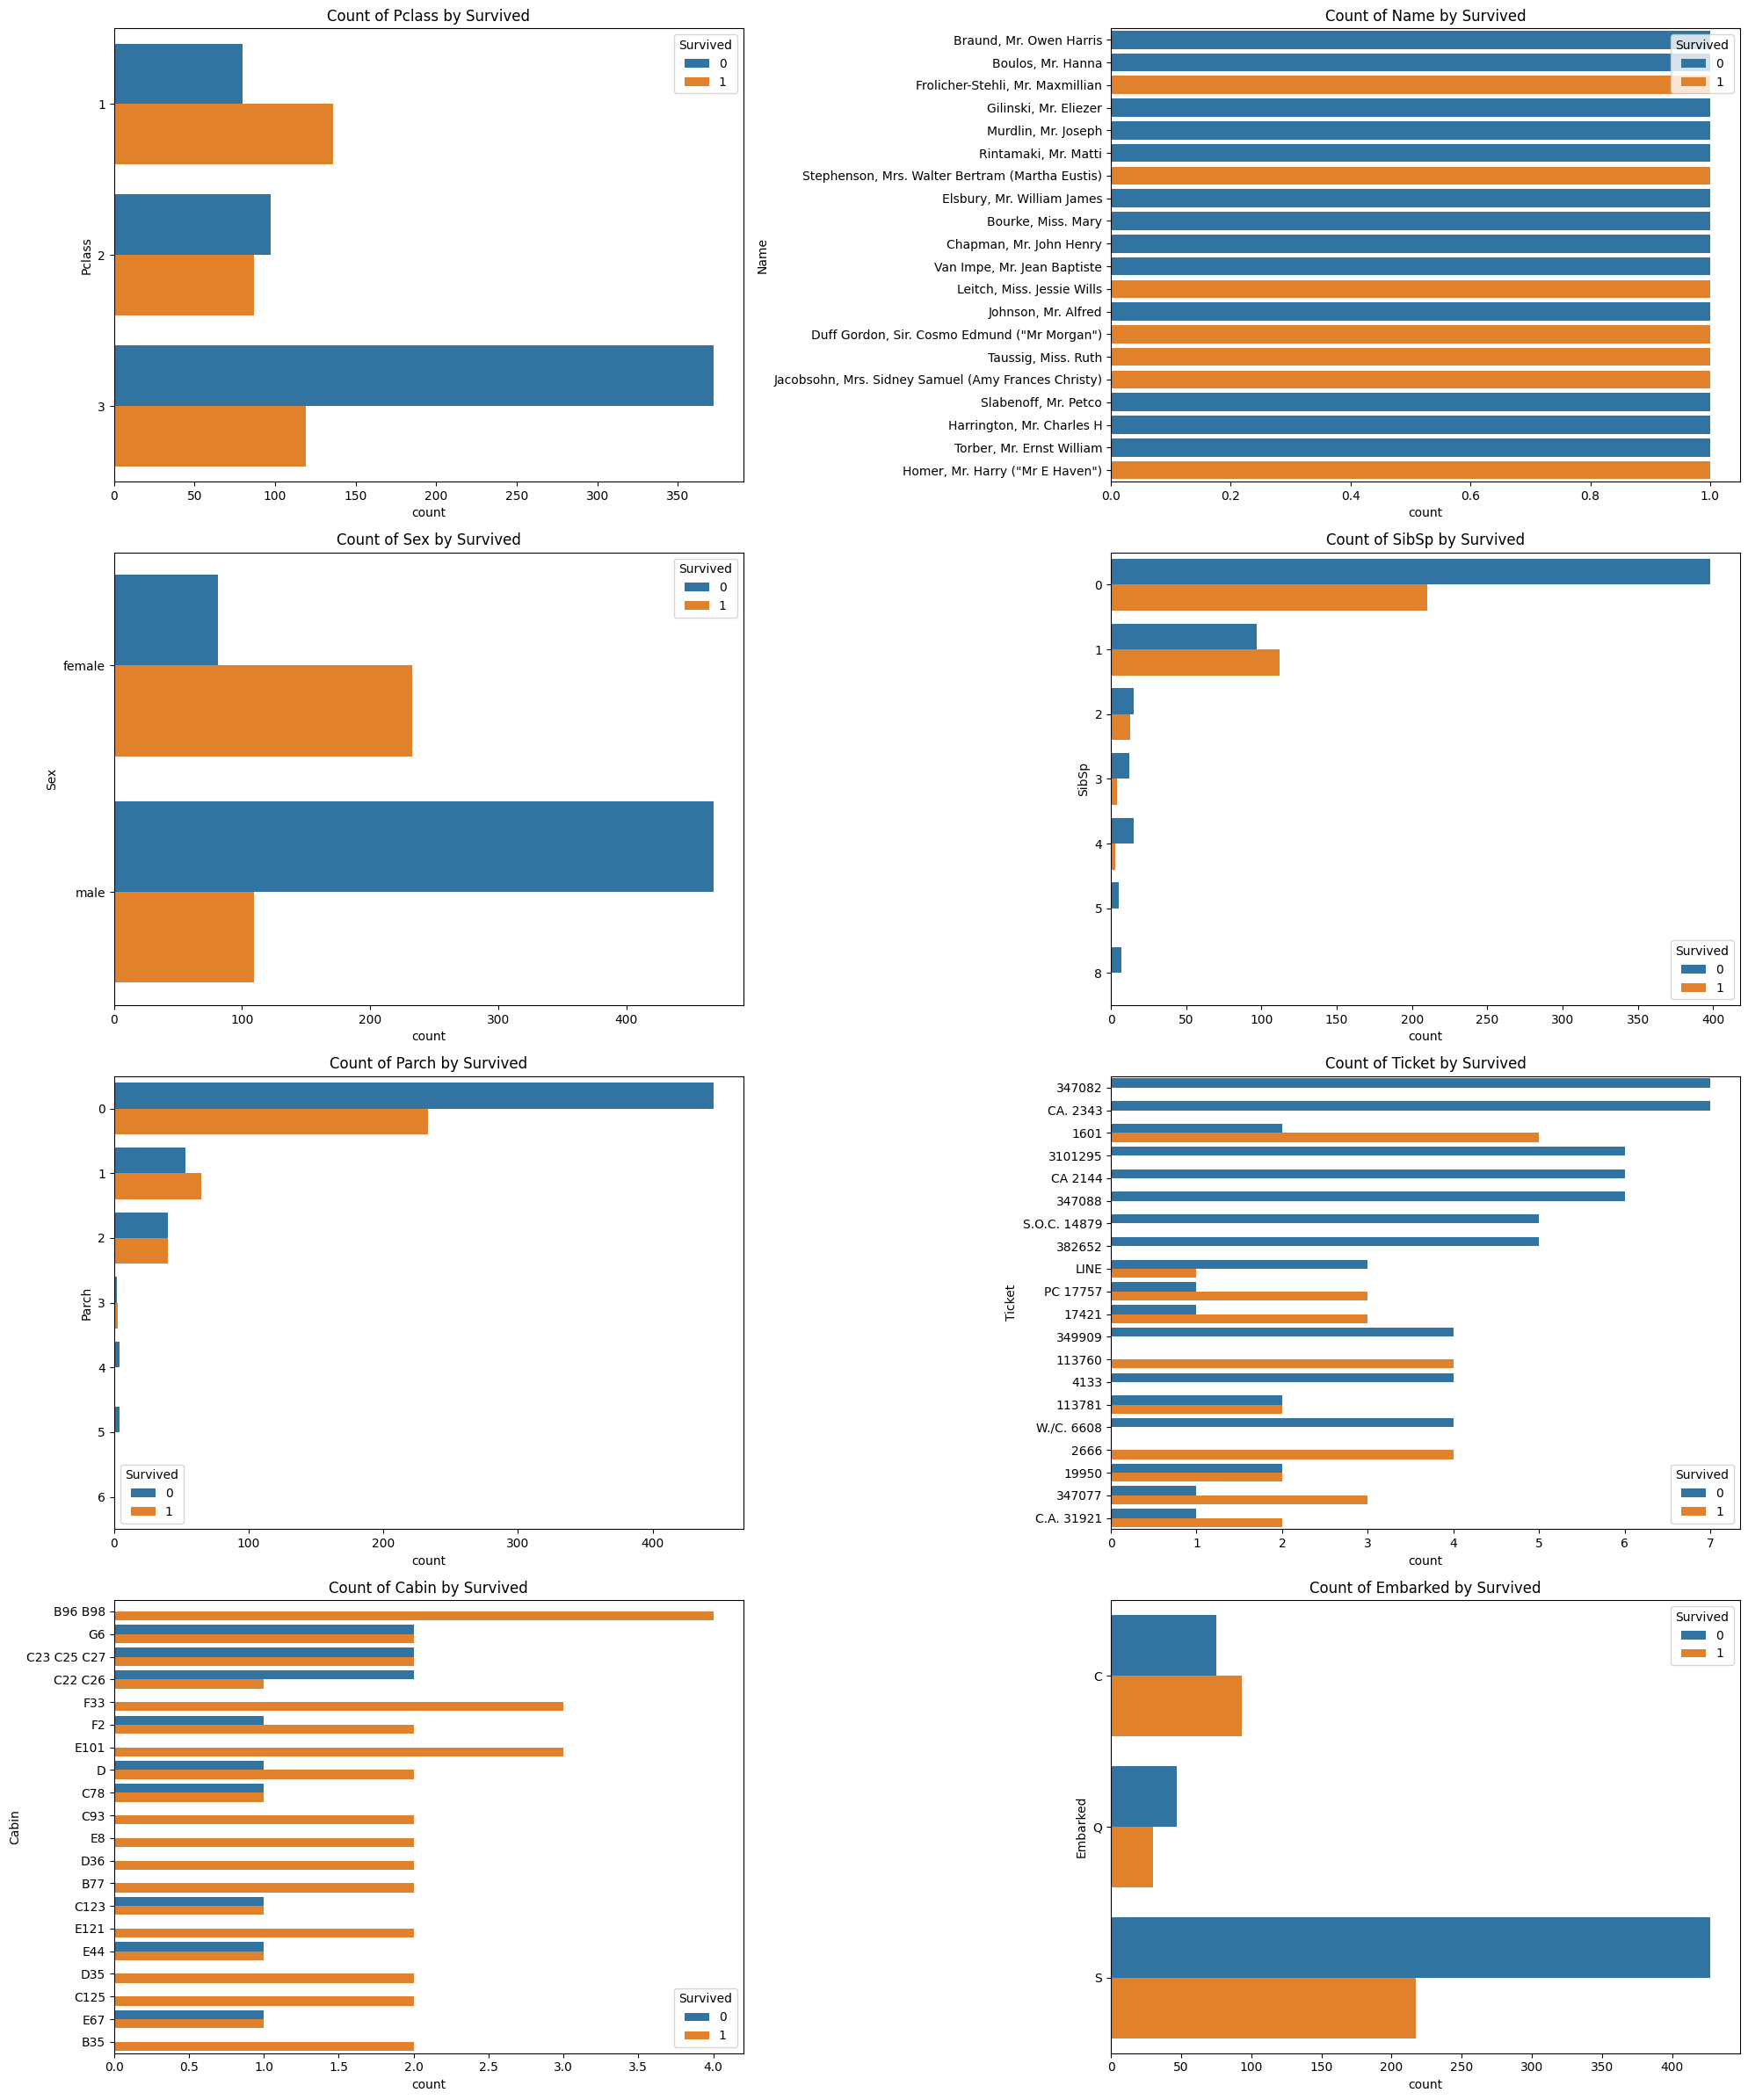

In [61]:
n_cols = 2
n_rows = len(CATEGORY_COLUMNS) // n_cols + len(CATEGORY_COLUMNS) % n_cols

plt.figure(figsize=(20, n_rows*6))
for i, column in enumerate(CATEGORY_COLUMNS, 1):
    plt.subplot(n_rows, n_cols, i)
    counts = df_train[column].value_counts()
    if len(counts) > 20:
        counts = counts.head(20)
    else:
        counts = counts.sort_index()
    df_filtered = df_train[df_train[column].isin(counts.index)]
    sns.countplot(y=column, hue=OBJECT_VARIABLE, data=df_filtered, order=counts.index)
    plt.title(f"Count of {column} by {OBJECT_VARIABLE}")
    plt.tight_layout()
plt.show()